カーネル密度関数に関する説明 https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

一言でいうとなめらかなヒストグラムを作る
データがあるところにガウス推定（正規分布？）を作成→データが多いところは高くなる

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd 

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
dataset = randn(25)
dataset

array([ 0.56559248, -0.22588749,  0.85157318,  0.14754268,  0.08499325,
       -0.0857058 , -0.72562689,  1.1229156 ,  0.39862109, -0.46919047,
       -0.20722406, -0.73802767, -0.59909271, -0.33612355, -1.10501798,
       -0.79873049, -0.58730206, -0.34318628,  0.0819692 ,  0.61164792,
       -0.16732973,  0.24045789,  0.06821661, -0.66174889, -0.15090795])

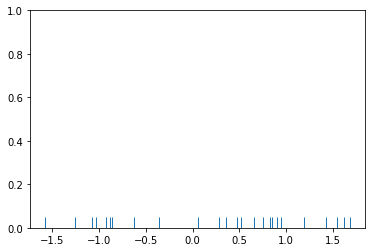

In [4]:
sns.rugplot(dataset)

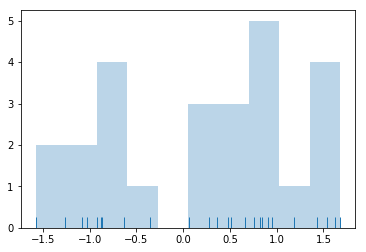

In [6]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

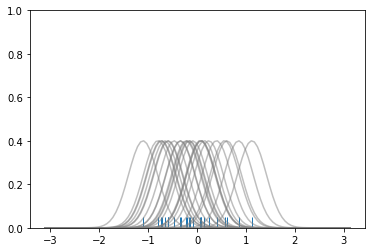

In [9]:
# Bandwidth selection 一個一個の幅を推定？
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() +2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color = 'gray', alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Bases Functions')

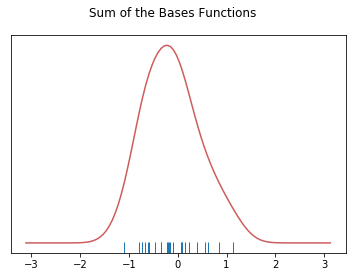

In [10]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Bases Functions')

In [11]:
#seabornを使うと１行

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


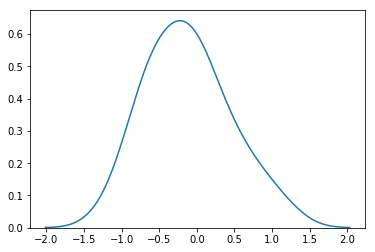

In [12]:
sns.kdeplot(dataset)

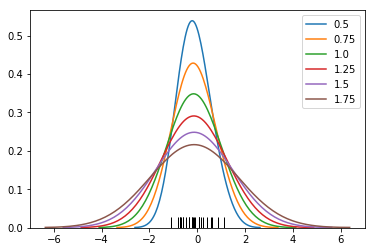

In [13]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25): #バンド幅によってカーネル密度関数がどうなるか
    sns.kdeplot(dataset, bw=bw, label=bw)

正規分布を使ったがその他も使える

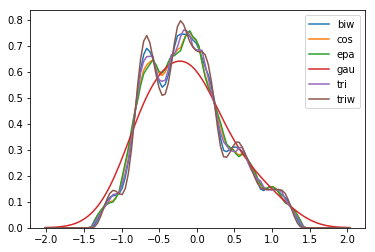

In [15]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']#詳しくは公式ドキュメントで
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


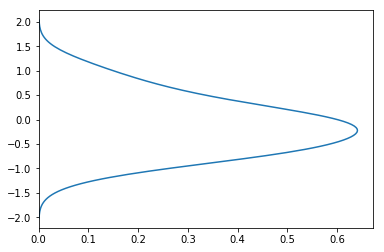

In [16]:
sns.kdeplot(dataset, vertical=True)

Cumulative Distribution function
累積分布関数
ヒストグラムを積み上げる感じ

(array([ 1.,  5.,  8., 11., 15., 19., 21., 23., 24., 25.]),
 array([-1.10501798, -0.88222462, -0.65943127, -0.43663791, -0.21384455,
         0.00894881,  0.23174217,  0.45453553,  0.67732888,  0.90012224,
         1.1229156 ]),
 <a list of 10 Patch objects>)

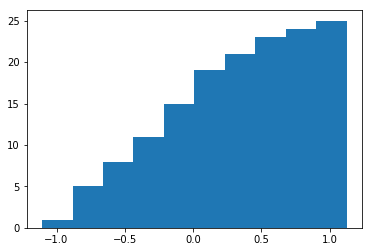

In [18]:
plt.hist(dataset, cumulative=True)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


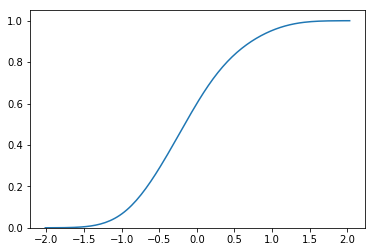

In [19]:
#累積分布関数に関してもカーネル密度推定を用いてなめらかに
sns.kdeplot(dataset, cumulative=True)

In [21]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov, 1000)#多変量

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


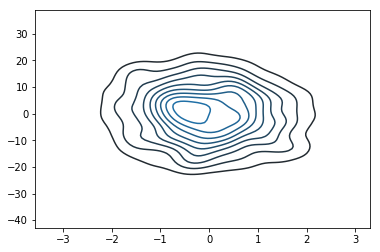

In [22]:
dframe = pd.DataFrame(dataset2, columns=['X','Y'])
sns.kdeplot(dframe)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


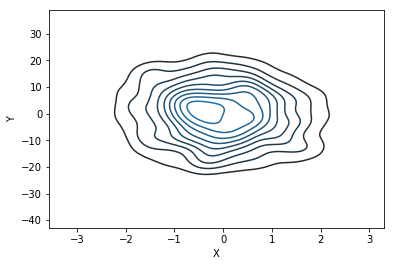

In [23]:
sns.kdeplot(dframe.X, dframe.Y)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


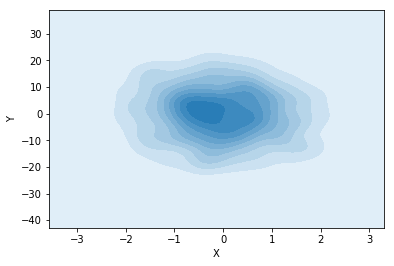

In [24]:
sns.kdeplot(dframe.X, dframe.Y,shade=True)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


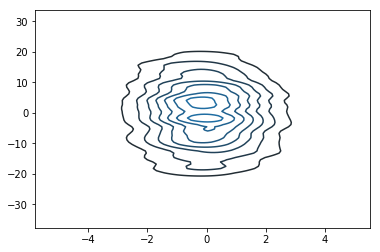

In [25]:
sns.kdeplot(dframe, bw=1)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


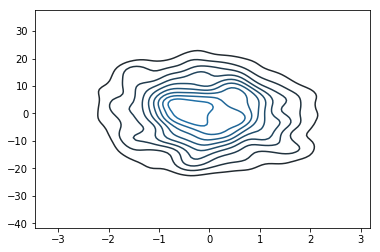

In [26]:
sns.kdeplot(dframe, bw='silverman')

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


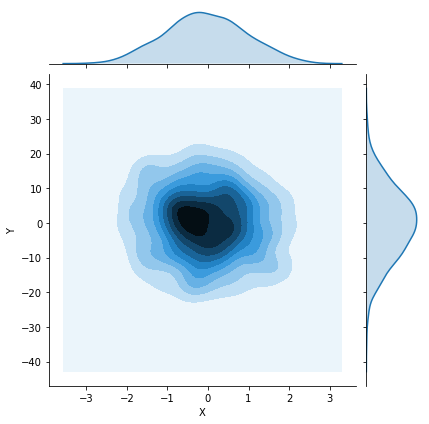

In [27]:
#ジョイントディストリビューション 同時分布？
sns.jointplot('X','Y', dframe, kind='kde')